### Retrieve the Data from e-katanalotis.gr
#### Date range: 26/07/2024  -  30/07/2024

#### Get and Save the JSON file

In [63]:
import requests

url = "https://warply.s3.eu-west-1.amazonaws.com/applications/ed840ad545884deeb6c6b699176797ed/basket-retailers/basket.json"
response = requests.get(url)

# Save the JSON content to a local file
with open('basket.json', 'w') as file:
    file.write(response.text)

print("JSON file downloaded and saved as 'basket.json'")

JSON file downloaded and saved as 'basket.json'


#### Convert the JSON to a DataFrame through json library

In [64]:
import json

# Load the JSON data from the file
with open('basket.json', 'r', encoding='utf-8') as file: 
    data = json.load(file)

**Explanation**
`open('path_to_your_file/basket.json', 'r', encoding='utf-8')`: 
- This function opens the file located at 'path_to_your_file/basket.json'
- in read mode ('r').
- The encoding='utf-8' parameter ensures that the file is read with the UTF-8 encoding, which is useful for handling special characters.
- `as file`: This part of the line assigns the opened file object to the variable file for use within the block of code that follows.
- `with statement`: Using with ensures that the file is properly closed after its suite finishes, even if an exception is raised.
- `json.load(file)`: This function reads the JSON content from the file object file and parses it into a Python dictionary.
- `data` =: The parsed JSON data is stored in the variable data.



In [65]:
import pandas as pd

**Explanation**
- As the JSON's nesting is structured based on the retailer, I need to break this nesting first
- Create one df for each retailer that includes: basket data, name, date
- Create the empty df `df_basket_26_30` that will aggregate all dfs for each retailer.

In [66]:
# Initialize an empty DataFrame to store all data
df_basket_26_30_new = pd.DataFrame()

In [67]:
# Debugging: Print structure of data
print("Data keys: ", data.keys())
print("Retailers: ", data['retailers'].keys())

for retailer_key, retailer_value in data['retailers'].items():

    # Debugging: Print retailer details
    print(f"Processing retailer: {retailer_value['name']}")
    
    # using the json_normalize function to flatten the basket_items list 
    # of dictionaries into a DataFrame (for each retailer) where each dictionary 
    # becomes a row an the dictionary's keys become columns.
    df_retailer = pd.json_normalize(retailer_value['basket'])

    # adding extra information into the DataFrame
    df_retailer['retailer_name'] = retailer_value['name']
    df_retailer['from'] = data['from']
    df_retailer['until'] = data['to']

    # Debugging: Print structure of df_retailer
    print("---------------")
    print("Columns in df_retailer: ", df_retailer.columns)

    # Concatenate the retailer's DataFrame to the master DataFrame
    df_basket_26_30_new  = pd.concat([df_basket_26_30_new , df_retailer], ignore_index=True)

    # Test print
    print("---------------")
    print(df_retailer.head())

Data keys:  dict_keys(['from', 'to', 'base_url', 'variance', 'retailers'])
Retailers:  dict_keys(['ab', 'bazaar', 'galaxias', 'efood', 'efresh', 'kantzas', 'kritikos', 'lidl', 'masoutis', 'marketin', 'mymarket', 'pitsias', 'sklavenitis', 'synka', 'wolt', 'xalkiadakis'])
Processing retailer: ΑΒ Βασιλόπουλος
---------------
Columns in df_retailer:  Index(['CATEGORY', 'BARCODE', 'NAME', 'PRICE', 'PRICE_NORMALIZED', 'IMAGE',
       'PL', 'CATEGORY_NAME', 'UNIT', 'DISPLAY', 'retailer_name', 'from',
       'until'],
      dtype='object')
---------------
  CATEGORY        BARCODE                              NAME PRICE  \
0        1  5201502110050  AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR  2.00   
1        1  5202336124374     ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG  1.79   
2        2  5202336109876        ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ  0.75   
3        3  5204647003683     ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ  0.68   
4        3  5214000155980            ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ  0.99   

  PRICE_NORMALIZED        IMAGE

In [68]:
# Display the final DataFrame to check the results
print("Final DataFrame:")
print(df_basket_26_30_new.head())

Final DataFrame:
  CATEGORY        BARCODE                              NAME PRICE  \
0        1  5201502110050  AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR  2.00   
1        1  5202336124374     ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG  1.79   
2        2  5202336109876        ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ  0.75   
3        3  5204647003683     ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ  0.68   
4        3  5214000155980            ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ  0.99   

  PRICE_NORMALIZED        IMAGE PL   CATEGORY_NAME UNIT DISPLAY  \
0             4.00  7283604.jpg  0            Ρύζι   Kg           
1             1.79  7614627.jpg  1            Ρύζι   Kg           
2             2.21  7347418.jpg  1   Ψωμί για Tοστ   Kg           
3             1.94  7619515.jpg  0  Ψωμί Φραντζόλα   Kg           
4             2.83  7293943.jpg  0  Ψωμί Φραντζόλα   Kg           

     retailer_name        from       until null PRICE           
0  ΑΒ Βασιλόπουλος  24-07-2024  30-07-2024  NaN            NaN  
1  ΑΒ Βασιλόπουλος  24-07-2024  30-

In [69]:
df_basket_26_30_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CATEGORY          1330 non-null   object
 1   BARCODE           1330 non-null   object
 2   NAME              1330 non-null   object
 3   PRICE             1253 non-null   object
 4   PRICE_NORMALIZED  1330 non-null   object
 5   IMAGE             1330 non-null   object
 6   PL                1330 non-null   object
 7   CATEGORY_NAME     1330 non-null   object
 8   UNIT              1330 non-null   object
 9   DISPLAY           1330 non-null   object
 10  retailer_name     1330 non-null   object
 11  from              1330 non-null   object
 12  until             1330 non-null   object
 13  null              2 non-null      object
 14  PRICE             77 non-null     object
dtypes: object(15)
memory usage: 156.0+ KB


In [70]:
# save the DataFrame to a CSV file
df_basket_26_30_new.to_csv('df_basket_26-30 July 2024.csv', index=False)

### Clean the Data

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("df_basket_26-30 July 2024.csv")
df.head()

,CATEGORY,BARCODE,NAME,PRICE,PRICE_NORMALIZED,IMAGE,PL,CATEGORY_NAME,UNIT,DISPLAY,retailer_name,from,until,null,PRICE
0,1,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,2.00,4.00,7283604.jpg,0,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN,NaN
1,1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,1.79,1.79,7614627.jpg,1,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN,NaN
2,2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,0.75,2.21,7347418.jpg,1,Ψωμί για Tοστ,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN,NaN
3,3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,0.68,1.94,7619515.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN,NaN
4,3,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,0.99,2.83,7293943.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CATEGORY          1330 non-null   int64  
 1   BARCODE           1329 non-null   object 
 2   NAME              1330 non-null   object 
 3   PRICE             1252 non-null   object 
 4   PRICE_NORMALIZED  1330 non-null   float64
 5   IMAGE             1330 non-null   object 
 6   PL                1329 non-null   object 
 7   CATEGORY_NAME     1330 non-null   object 
 8   UNIT              1330 non-null   object 
 9   DISPLAY           33 non-null     object 
 10  retailer_name     1330 non-null   object 
 11  from              1330 non-null   object 
 12  until             1330 non-null   object 
 13  null              2 non-null      object 
 14  PRICE             77 non-null     float64
dtypes: float64(2), int64(1), object(12)
memory usage: 156.0+ KB


**Thoughts on cleaning the data**
- delete empty column "null"
- The retailer Χαλκιαδακης has all the prices moved into a second price column
- correct row 1104
- figure out what is the PL column. Probably indicates "Private Label"
- rename the "DISPLAY" column into "diabetes". Give 0 to the nulls and 1 to the rest
- correct datatypes

**Use the merchants, categories & suppliers dfs I already have**
- Match the smaller categories to the largest categories
- Match the retailers to the merchants standardized name and full name
- Match the suppliers according to each product name (probably I need to use regex)

**NOTE:** 
My merchants csv has probably changed as new merchants like WOLT MARKET have been added rececntly

#### 1. Drop empty column Null

In [6]:
df = df.drop(columns = ['null'])
df.head()

,CATEGORY,BARCODE,NAME,PRICE,PRICE_NORMALIZED,IMAGE,PL,CATEGORY_NAME,UNIT,DISPLAY,retailer_name,from,until,PRICE
0,1,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,2.00,4.00,7283604.jpg,0,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN
1,1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,1.79,1.79,7614627.jpg,1,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN
2,2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,0.75,2.21,7347418.jpg,1,Ψωμί για Tοστ,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN
3,3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,0.68,1.94,7619515.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN
4,3,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,0.99,2.83,7293943.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN


#### 2. Rename DISPLAY column to DIABETES

In [7]:
df = df.rename(columns={'DISPLAY':'DIABETES'})
df.head()

,CATEGORY,BARCODE,NAME,PRICE,PRICE_NORMALIZED,IMAGE,PL,CATEGORY_NAME,UNIT,DIABETES,retailer_name,from,until,PRICE
0,1,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,2.00,4.00,7283604.jpg,0,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN
1,1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,1.79,1.79,7614627.jpg,1,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN
2,2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,0.75,2.21,7347418.jpg,1,Ψωμί για Tοστ,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN
3,3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,0.68,1.94,7619515.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN
4,3,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,0.99,2.83,7293943.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024,NaN


#### 3. Fix row 1104

In [8]:
df.loc[1104, 'PRICE'] = '6.52'
df.loc[1104, 'IMAGE'] = '230782.jpg'
df.loc[1104, 'PL'] = 0
df.loc[1104, 'NAME'] = 'ΓΑΛΟΠΟΥΛΑ Θ/Γ ΒΡΑΣΤ.10Χ10(ΚΙΛΟ)Χ/ΓΛΟΥΤ ΥΦΑΝΤΗΣ'
print(df.loc[1104])

CATEGORY                                                         8
BARCODE                                              2110880000000
NAME                ΓΑΛΟΠΟΥΛΑ Θ/Γ ΒΡΑΣΤ.10Χ10(ΚΙΛΟ)Χ/ΓΛΟΥΤ ΥΦΑΝΤΗΣ
PRICE                                                         6.52
PRICE_NORMALIZED                                              6.52
IMAGE                                                   230782.jpg
PL                                                               0
CATEGORY_NAME                                            Γαλοπούλα
UNIT                                                            Kg
DIABETES                                                       NaN
retailer_name                                                Synka
from                                                    24-07-2024
until                                                   30-07-2024
PRICE                                                          NaN
Name: 1104, dtype: object


#### 4. Check for identical rows 

In [9]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


#### 5. Fix the PRICE issue for Χαλκιαδάκης

In [10]:
# List all column names with their positions
for idx, col in enumerate(df.columns):
    print(f"Column {idx}: {col}")

Column 0: CATEGORY
Column 1: BARCODE
Column 2: NAME
Column 3: PRICE
Column 4: PRICE_NORMALIZED
Column 5: IMAGE
Column 6: PL
Column 7: CATEGORY_NAME
Column 8: UNIT
Column 9: DIABETES
Column 10: retailer_name
Column 11: from
Column 12: until
Column 13: PRICE         


In [11]:
# Combine the two PRICE columns by position
df.iloc[:, 3] = df.iloc[:, 3].combine_first(df.iloc[:, 13])

# Drop the secondary PRICE column by position
df = df.drop(df.columns[13], axis=1)

df.head()

,CATEGORY,BARCODE,NAME,PRICE,PRICE_NORMALIZED,IMAGE,PL,CATEGORY_NAME,UNIT,DIABETES,retailer_name,from,until
0,1,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,2.00,4.00,7283604.jpg,0,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024
1,1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,1.79,1.79,7614627.jpg,1,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024
2,2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,0.75,2.21,7347418.jpg,1,Ψωμί για Tοστ,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024
3,3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,0.68,1.94,7619515.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024
4,3,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,0.99,2.83,7293943.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,24-07-2024,30-07-2024


In [12]:
# check the result
filtered_df = df[df['retailer_name'] == 'Χαλκιαδάκης']
filtered_df.head(10)

,CATEGORY,BARCODE,NAME,PRICE,PRICE_NORMALIZED,IMAGE,PL,CATEGORY_NAME,UNIT,DIABETES,retailer_name,from,until
1253,1,161245,Ωμέγα Special Ρύζι Καρολίνα 500 gr,0.9,1.80,161245.jpg,0,Ρύζι,Kg,NaN,Χαλκιαδάκης,24-07-2024,30-07-2024
1254,2,148933,Κατσέλης Ψωμί Τοστ Σταρένιο 720 gr,1.3,1.81,148933.jpg,0,Ψωμί για Tοστ,Kg,NaN,Χαλκιαδάκης,24-07-2024,30-07-2024
1255,3,181575,Κατσέλης Διπλοζυμωτό Ψωμί Με Προζύμι Σταρένιο ...,1.68,3.36,181575.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,Χαλκιαδάκης,24-07-2024,30-07-2024
1256,4,78388,Forma Φρυγανιές Σταρένιες 3 x 125 gr + 1 Δώρο,1.35,2.70,78388.jpg,0,Φρυγανιές,Kg,NaN,Χαλκιαδάκης,24-07-2024,30-07-2024
1257,5,34472,Ήλιος Μακαρόνια Σπαγγέτι Ν6 500 gr,0.58,1.16,34472.jpg,0,Μακαρόνια Νο 6,Kg,NaN,Χαλκιαδάκης,24-07-2024,30-07-2024
1258,6,19115,Χοιρινό Μπουκιές Α/Ο Ελληνικό,6.8,6.80,19115.jpg,0,Νωπό Χοιρινό,Kg,NaN,Χαλκιαδάκης,24-07-2024,30-07-2024
1259,7,177105,ΚΟΤ/ΛΟ 65% Ν.ΑΜΒΡΟΣΙΑΔΗΣ ΕΛΛ ΧΥΜ,2.98,2.98,177105.jpg,0,Νωπό Κοτόπουλο Ολόκληρο,Kg,NaN,Χαλκιαδάκης,24-07-2024,30-07-2024
1260,7,89355,Αγ. Ιωάννης Κοτόπουλο 65% Ελληνικό,2.98,2.98,89355.jpg,0,Νωπό Κοτόπουλο Ολόκληρο,Kg,NaN,Χαλκιαδάκης,24-07-2024,30-07-2024
1261,7,98808,Αγροζωή Κοτόπουλο 65% Ελληνικό,2.98,2.98,98808.jpg,0,Νωπό Κοτόπουλο Ολόκληρο,Kg,NaN,Χαλκιαδάκης,24-07-2024,30-07-2024
1262,7,189343,Νιτσιάκος Κοτόπουλο Ελληνικό,2.98,2.98,189343.jpg,0,Νωπό Κοτόπουλο Ολόκληρο,Kg,NaN,Χαλκιαδάκης,24-07-2024,30-07-2024


#### 6. Data type concversions

In [13]:
# a. dates 
df['from'] = pd.to_datetime(df['from'], format='%d-%m-%Y')
df['until'] = pd.to_datetime(df['until'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CATEGORY          1330 non-null   int64         
 1   BARCODE           1329 non-null   object        
 2   NAME              1330 non-null   object        
 3   PRICE             1329 non-null   object        
 4   PRICE_NORMALIZED  1330 non-null   float64       
 5   IMAGE             1330 non-null   object        
 6   PL                1329 non-null   object        
 7   CATEGORY_NAME     1330 non-null   object        
 8   UNIT              1330 non-null   object        
 9   DIABETES          33 non-null     object        
 10  retailer_name     1330 non-null   object        
 11  from              1330 non-null   datetime64[ns]
 12  until             1330 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 135.2+ KB


In [14]:
# b. price to float
df['PRICE'] = df['PRICE'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CATEGORY          1330 non-null   int64         
 1   BARCODE           1329 non-null   object        
 2   NAME              1330 non-null   object        
 3   PRICE             1329 non-null   float64       
 4   PRICE_NORMALIZED  1330 non-null   float64       
 5   IMAGE             1330 non-null   object        
 6   PL                1329 non-null   object        
 7   CATEGORY_NAME     1330 non-null   object        
 8   UNIT              1330 non-null   object        
 9   DIABETES          33 non-null     object        
 10  retailer_name     1330 non-null   object        
 11  from              1330 non-null   datetime64[ns]
 12  until             1330 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 135.2+ KB


#### 7. Standardize the categories

By trying to match the categories of the df_category and the basket, it seems like the data are structured differently. 
This is probably because the df_categories is structured to follow all products and not just the products inside the basket. 
The basket products use a different categorisation. 
For this reason I will not try to match the two datasets. Instead I will try to create parent categories for the basket_df from scratch. 
I will use, however, the stadardazation found for parent categoreis in all products. 
Here is a list: 
- Τρόφιμα Παντοπωλείου                              
- Καλλυντικά & Είδη Προσωπικής υγιεινής             
- Γιαούρτια, Κρέμες γάλακτος & Επιδόρπια ψυγείου    
- Απορρυπαντικά & Είδη Καθαρισμού                   
- Τυροκομικά & Φυτικά Αναπληρώματα                  
- Είδη πρωινού & Ροφήματα                           
- Είδη Αρτοζαχαροπλαστείου                          
- Αναψυκτικά, Νερά & Χυμοί                          
- Μπισκότα, Σοκολάτες & Ζαχαρώδη                    
- Κατεψυγμένα                                       
- Φρέσκα Φρούτα & Λαχανικά                          
- Αλλαντικά                                         
- Χαρτικά, Πάνες & Σερβιέτες                        
- Γάλατα, Ροφήματα & Χυμοί ψυγείου                   
- Φρέσκο Κρέας                                      
- Ορεκτικά & Delicatessen                           
- Ξηροί Καρποί & Σνακ                              
- Βρεφικές & Παιδικές τροφές                      
- Τροφές & Είδη για Κατοικίδια                     
- Αυγά, Βούτυρο, Νωπές Ζύμες & Ζωμοί              
- Είδη μιας χρήσης & Είδη Πάρτι                    
- Είδη Οικιακής χρήσης                             
- Φρέσκο Ψάρι & Θαλασσινά                          
- Έτοιμα Γεύματα                                    
- Κάβα                                           

In [15]:
# The categories I already have
df['CATEGORY_NAME'].value_counts()

CATEGORY_NAME
Πάνες για Μωρά                                                  55
Λαχανικά Κατεψυγμένα                                            45
Πάνες Ακράτειας                                                 43
Γάλα Φρέσκο Πλήρες                                              35
Σερβιέτες ή Ταμπόν                                              34
Λευκή Ζάχαρη                                                    34
Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%)                                 34
Αυγά                                                            30
Γάλα Εβαπορέ                                                    30
Γαλοπούλα                                                       29
Σαμπουάν                                                        29
Ψωμί Φραντζόλα                                                  28
Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες                       28
Αλεύρι                                                          27
Γιαούρτι από Γάλα Αγελάδος Χωρίς Γεύσεις        

In [16]:
# Create a mapping of how I want to match the existing and the parent categories: 

mapping = {
    "Πάνες για Μωρά": "Χαρτικά, Πάνες & Σερβιέτες",
    "Λαχανικά Κατεψυγμένα": "Κατεψυγμένα",
    "Πάνες Ακράτειας": "Χαρτικά, Πάνες & Σερβιέτες",
    "Γάλα Φρέσκο Πλήρες": "Γάλατα, Ροφήματα & Χυμοί ψυγείου",
    "Σερβιέτες ή Ταμπόν": "Χαρτικά, Πάνες & Σερβιέτες",
    "Λευκή Ζάχαρη": "Τρόφιμα Παντοπωλείου",
    "Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%)": "Γάλατα, Ροφήματα & Χυμοί ψυγείου",
    "Αυγά": "Αυγά, Βούτυρο, Νωπές Ζύμες & Ζωμοί",
    "Γάλα Εβαπορέ": "Γάλατα, Ροφήματα & Χυμοί ψυγείου",
    "Γαλοπούλα": "Αλλαντικά",
    "Σαμπουάν": "Καλλυντικά & Είδη Προσωπικής υγιεινής",
    "Ψωμί Φραντζόλα": "Είδη Αρτοζαχαροπλαστείου",
    "Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες": "Απορρυπαντικά & Είδη Καθαρισμού",
    "Αλεύρι": "Τρόφιμα Παντοπωλείου",
    "Γιαούρτι από Γάλα Αγελάδος Χωρίς Γεύσεις": "Γιαούρτια, Κρέμες γάλακτος & Επιδόρπια ψυγείου",
    "Νωπό Κοτόπουλο Ολόκληρο": "Φρέσκο Κρέας",
    "Ρύζι": "Τρόφιμα Παντοπωλείου",
    "Γιαούρτι από Γάλα Αγελάδος Χωρίς Γεύσεις (Χαμηλά Λιπαρά <2%)": "Γιαούρτια, Κρέμες γάλακτος & Επιδόρπια ψυγείου",
    "Τυρί Γκούντα": "Τυροκομικά & Φυτικά Αναπληρώματα",
    "Μωρομάντηλα": "Χαρτικά, Πάνες & Σερβιέτες",
    "Μοσχάρι": "Φρέσκο Κρέας",
    "Απορρυπαντικά Πλυντηρίου": "Απορρυπαντικά & Είδη Καθαρισμού",
    "Χυμός Τομάτας Διατηρημένος": "Τρόφιμα Παντοπωλείου",
    "Απορρυπαντικά Πιάτων": "Απορρυπαντικά & Είδη Καθαρισμού",
    "Φακές": "Τρόφιμα Παντοπωλείου",
    "Πάριζα": "Αλλαντικά",
    "Φασόλια": "Τρόφιμα Παντοπωλείου",
    "Ρεβύθια": "Τρόφιμα Παντοπωλείου",
    "Μακαρόνια Νο 6": "Τρόφιμα Παντοπωλείου",
    "Νωπό Χοιρινό": "Φρέσκο Κρέας",
    "Λευκό τυρί": "Τυροκομικά & Φυτικά Αναπληρώματα",
    "Τροφή για Σκύλους": "Τροφές & Είδη για Κατοικίδια",
    "Σαμπουάν για Μωρά": "Καλλυντικά & Είδη Προσωπικής υγιεινής",
    "Τυρί Φέτα": "Τυροκομικά & Φυτικά Αναπληρώματα",
    "Τροφή για γάτες": "Τροφές & Είδη για Κατοικίδια",
    "Σαπούνι Στερεό": "Καλλυντικά & Είδη Προσωπικής υγιεινής",
    "Μαργαρίνες": "Τυροκομικά & Φυτικά Αναπληρώματα",
    "Χαρτί Κουζίνας": "Χαρτικά, Πάνες & Σερβιέτες",
    "Χαρτί Υγείας": "Χαρτικά, Πάνες & Σερβιέτες",
    "Φρυγανιές": "Είδη Αρτοζαχαροπλαστείου",
    "Γάλα παστερίωσης με χαμηλά λιπαρά": "Γάλατα, Ροφήματα & Χυμοί ψυγείου",
    "Γάλα υψηλής παστερίωσης πλήρες": "Γάλατα, Ροφήματα & Χυμοί ψυγείου",
    "Ψωμί για Tοστ": "Είδη Αρτοζαχαροπλαστείου",
    "Παρθένο Ελαιόλαδο": "Τρόφιμα Παντοπωλείου",
    "Ελληνικός Καφές": "Είδη πρωινού & Ροφήματα",
    "Τυρί με Χαμηλά Λιπαρά": "Τυροκομικά & Φυτικά Αναπληρώματα",
    "Προϊόντα Βρώμης": "Είδη πρωινού & Ροφήματα",
    "Ηλιέλαιο": "Τρόφιμα Παντοπωλείου",
    "Γάλα για βρέφη": "Βρεφικές & Παιδικές τροφές",
    "Γλυκαντικές Ουσίες Κατάλληλες για Διαβητικούς": "Τρόφιμα Παντοπωλείου",
    "Ψάρια Κατεψυγμένα": "Κατεψυγμένα",
    "Οδοντόκρεμα": "Καλλυντικά & Είδη Προσωπικής υγιεινής",
    "Χυμός Πορτοκάλι": "Αναψυκτικά, Νερά & Χυμοί",
    "Στιγμιαίος Καφές": "Είδη πρωινού & Ροφήματα",
    "Γαλλικός Καφές": "Είδη πρωινού & Ροφήματα",
    "Κρέμες για βρέφη": "Βρεφικές & Παιδικές τροφές"
}

# Create a new column in df to store the parent categories based on the mapping
df['PARENT_CATEG'] = df['CATEGORY_NAME'].map(mapping)
df.head()

,CATEGORY,BARCODE,NAME,PRICE,PRICE_NORMALIZED,IMAGE,PL,CATEGORY_NAME,UNIT,DIABETES,retailer_name,from,until,PARENT_CATEG
0,1,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,2.00,4.00,7283604.jpg,0,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Τρόφιμα Παντοπωλείου
1,1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,1.79,1.79,7614627.jpg,1,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Τρόφιμα Παντοπωλείου
2,2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,0.75,2.21,7347418.jpg,1,Ψωμί για Tοστ,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου
3,3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,0.68,1.94,7619515.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου
4,3,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,0.99,2.83,7293943.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου


In [17]:
df = df.rename(columns={'CATEGORY':'CATEGORY_uuid'})
df.head()

,CATEGORY_uuid,BARCODE,NAME,PRICE,PRICE_NORMALIZED,IMAGE,PL,CATEGORY_NAME,UNIT,DIABETES,retailer_name,from,until,PARENT_CATEG
0,1,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,2.00,4.00,7283604.jpg,0,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Τρόφιμα Παντοπωλείου
1,1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,1.79,1.79,7614627.jpg,1,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Τρόφιμα Παντοπωλείου
2,2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,0.75,2.21,7347418.jpg,1,Ψωμί για Tοστ,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου
3,3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,0.68,1.94,7619515.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου
4,3,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,0.99,2.83,7293943.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου


#### 8. Standardize merchants' names

In [18]:
df.columns = df.columns.str.lower()
df.rename(columns={'retailer_name': 'merchant_displayname'}, inplace=True)
df.head()

,category_uuid,barcode,name,price,price_normalized,image,pl,category_name,unit,diabetes,merchant_displayname,from,until,parent_categ
0,1,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,2.00,4.00,7283604.jpg,0,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Τρόφιμα Παντοπωλείου
1,1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,1.79,1.79,7614627.jpg,1,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Τρόφιμα Παντοπωλείου
2,2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,0.75,2.21,7347418.jpg,1,Ψωμί για Tοστ,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου
3,3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,0.68,1.94,7619515.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου
4,3,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,0.99,2.83,7293943.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου


In [19]:
# mapping the normalized merchants' names
merchant_name_mapping = {
    'Μασούτης': 'masoutis',
    'Γαλαξίας': 'galaxias',
    'ΑΒ Βασιλόπουλος': 'ab',
    'Σκλαβενίτης': 'sklavenitis',
    'Synka': 'synka',
    'Κρητικός': 'kritikos',
    'MarketIn': 'marketin',
    'MyMarket': 'mymarket',
    'Χαλκιαδάκης': 'xalkiadakis',
    'Πιτσιάς': 'pitsias',
    'Bazaar': 'bazaar',
    'efood': 'efood',
    'Lidl': 'lidl',
    'Wolt Market': 'wolt',
    'Κάντζας': 'kantzas',
    'e-Fresh': 'efresh'
}

# Create a new column in df_basket with normalized merchant names
df['merchant_name'] = df['merchant_displayname'].map(merchant_name_mapping)
df.head()

,category_uuid,barcode,name,price,price_normalized,image,pl,category_name,unit,diabetes,merchant_displayname,from,until,parent_categ,merchant_name
0,1,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,2.00,4.00,7283604.jpg,0,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Τρόφιμα Παντοπωλείου,ab
1,1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,1.79,1.79,7614627.jpg,1,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Τρόφιμα Παντοπωλείου,ab
2,2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,0.75,2.21,7347418.jpg,1,Ψωμί για Tοστ,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου,ab
3,3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,0.68,1.94,7619515.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου,ab
4,3,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,0.99,2.83,7293943.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου,ab


In [20]:
df['merchant_name'].value_counts()

merchant_name
masoutis       122
galaxias       111
ab             110
sklavenitis    107
synka           97
kritikos        91
marketin        79
mymarket        78
xalkiadakis     77
pitsias         71
bazaar          69
efood           68
lidl            67
wolt            63
kantzas         62
efresh          58
Name: count, dtype: int64

#### Rearrange columns' order

In [21]:
# Normalize column names to lowercase
df.columns = df.columns.str.lower()
df.head()

,category_uuid,barcode,name,price,price_normalized,image,pl,category_name,unit,diabetes,merchant_displayname,from,until,parent_categ,merchant_name
0,1,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,2.00,4.00,7283604.jpg,0,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Τρόφιμα Παντοπωλείου,ab
1,1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,1.79,1.79,7614627.jpg,1,Ρύζι,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Τρόφιμα Παντοπωλείου,ab
2,2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,0.75,2.21,7347418.jpg,1,Ψωμί για Tοστ,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου,ab
3,3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,0.68,1.94,7619515.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου,ab
4,3,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,0.99,2.83,7293943.jpg,0,Ψωμί Φραντζόλα,Kg,NaN,ΑΒ Βασιλόπουλος,2024-07-24,2024-07-30,Είδη Αρτοζαχαροπλαστείου,ab


In [22]:
desired_order = ['barcode','name','parent_categ','category_name','category_uuid','price', 
                 'price_normalized', 'unit', 'image','diabetes', 'merchant_name',
                 'merchant_displayname','pl', 'from', 'until']

# Reorder the DataFrame columns using the desired order
df = df[desired_order]
df.head()

,barcode,name,parent_categ,category_name,category_uuid,price,price_normalized,unit,image,diabetes,merchant_name,merchant_displayname,pl,from,until
0,5201502110050,AGRINO BELLA ΡΥΖΙ ΕΛΛΗΝΙΚΟ 500GR,Τρόφιμα Παντοπωλείου,Ρύζι,1,2.00,4.00,Kg,7283604.jpg,NaN,ab,ΑΒ Βασιλόπουλος,0,2024-07-24,2024-07-30
1,5202336124374,ΑΒ ΡΥΖΙ ΚΑΡΟΛΙΝΑ ΕΛΛΗΝΙΚΟ 1KG,Τρόφιμα Παντοπωλείου,Ρύζι,1,1.79,1.79,Kg,7614627.jpg,NaN,ab,ΑΒ Βασιλόπουλος,1,2024-07-24,2024-07-30
2,5202336109876,ΑΒ ΨΩΜΙ ΤΟΣΤ ΣΙΚΑΛΗΣ 340ΓΡ,Είδη Αρτοζαχαροπλαστείου,Ψωμί για Tοστ,2,0.75,2.21,Kg,7347418.jpg,NaN,ab,ΑΒ Βασιλόπουλος,1,2024-07-24,2024-07-30
3,5204647003683,ΑΡΤΟΠ/ΣΜΑ ΧΩΡΙΑΤΙΚΟ 350ΓΡ ΚΤΨ,Είδη Αρτοζαχαροπλαστείου,Ψωμί Φραντζόλα,3,0.68,1.94,Kg,7619515.jpg,NaN,ab,ΑΒ Βασιλόπουλος,0,2024-07-24,2024-07-30
4,5214000155980,ΑΡΤΟΣ ΤΟΥ ΧΩΡΙΟΥ 350ΓΡ,Είδη Αρτοζαχαροπλαστείου,Ψωμί Φραντζόλα,3,0.99,2.83,Kg,7293943.jpg,NaN,ab,ΑΒ Βασιλόπουλος,0,2024-07-24,2024-07-30


#### Save the dataframe

In [135]:
df.to_csv('kalathi-nikokyriou-26-30_07_2024.csv', index=False)

### Data Analysis

#### 1. Compare prices between normal retail and basket & normalize all products & merchants.csv merchants' names
**ΝΟΤ HELPFUL**

**Thoughts:**

Check if the price is reduced and how much.

Steps:
  1. Group basket per merchants
  2. Unpack products df with multiple listings per product `(see notebook "Products & Merchants_29-07-2024.ipynb")`
  3. Group products per merchants OK `(see Folder "all_products_merchant_dfs")`
  4. Match the products per merchant with the basket per merchant through name or barcode
  5. Compare the price
  6. Find the difference
  
**Alternative:**
1. Unpack products df with multiple listing per product
2. Check with the basket for common product name and common merchant
3. Compare
4. Find the difference


In [8]:
df_allproducts = pd.read_csv("df_products & merchants_26-30 July 2024.csv")
df_allproducts.columns = df_allproducts.columns.str.lower()
df_allproducts.rename(columns={'name_y': 'merchant_name'}, inplace=True)
df_allproducts.rename(columns={'display_name': 'merchant_displayname'}, inplace=True)
df_allproducts.rename(columns={'name_x': 'name'}, inplace=True)
df_allproducts.head()

,barcode,name,supplier,merchant_uuid,price,price_normalized,merchant_name,image,merchant_displayname
0,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),486.0,1.0,3.75,3.75,masoutis,masoutis.png,Μασούτης
1,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),486.0,4.0,3.09,3.09,mymarket,mymarket.png,My Market
2,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),486.0,7.0,2.98,2.98,synka,synka.png,Synka
3,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),486.0,8.0,2.98,2.98,xalkiadakis,xalkiadakis.png,Xalkiadakis
4,1001,ΠΙΝΔΟΣ ΚΟΤΟΠΟΥΛΟ ΕΛΛΗΝΙΚΟ ΝΩΠΟ(ΤΙΜ. ΚΙΛ),486.0,9.0,3.00,3.00,sklavenitis,sklavenitis.png,Σκλαβενίτης


In [9]:
df_allproducts['merchant_name'].value_counts()

merchant_name
mymarket       2626
kritikos       2542
ab             2518
masoutis       2449
sklavenitis    2343
galaxias       2241
synka          2050
efresh         2012
xalkiadakis    1964
marketin       1170
lidl            595
bazaar          348
Name: count, dtype: int64

In [138]:
df_allproducts.to_csv('df_products & merchants_26-30 July 2024.csv', index=False)

#### 2. Basic analytics

In [26]:
# how many products per merchant
df['merchant_name'].value_counts().reset_index(name='count')

,merchant_name,count
0,masoutis,122
1,galaxias,111
2,ab,110
3,sklavenitis,107
4,synka,97
5,kritikos,91
6,marketin,79
7,mymarket,78
8,xalkiadakis,77
9,pitsias,71


In [27]:
# how many private labels
df['pl'].value_counts(normalize=True).reset_index(name='count')

,pl,count
0,0,0.714823
1,1,0.283672
2,0,0.000752
3,279374.jpg,0.000752


In [28]:
# how many private labels per merchant
df.groupby('merchant_name')['pl'].value_counts().reset_index(name='count')

,merchant_name,pl,count
0,ab,0,61
1,ab,1,49
2,bazaar,0,37
3,bazaar,1,32
4,efood,0,68
5,efresh,0,58
6,galaxias,0,98
7,galaxias,1,13
8,kantzas,0,47
9,kantzas,1,15


In [29]:
# how many products per parent_categ per merchant
df.groupby('merchant_name')['parent_categ'].value_counts().sort_values(ascending=False).reset_index(name='count').head(30)

,merchant_name,parent_categ,count
0,ab,"Χαρτικά, Πάνες & Σερβιέτες",32
1,masoutis,"Χαρτικά, Πάνες & Σερβιέτες",25
2,kritikos,Τρόφιμα Παντοπωλείου,23
3,masoutis,Τρόφιμα Παντοπωλείου,22
4,sklavenitis,Τρόφιμα Παντοπωλείου,20
5,synka,Τρόφιμα Παντοπωλείου,19
6,bazaar,Τρόφιμα Παντοπωλείου,18
7,synka,"Χαρτικά, Πάνες & Σερβιέτες",18
8,marketin,Τρόφιμα Παντοπωλείου,18
9,ab,Τρόφιμα Παντοπωλείου,17


### 3. `Price normalization analysis across merchants`

#### Mean price per category per merchant

In [245]:
# Price Normalization Analysis
df.groupby(['category_name', 'merchant_name'])['price_normalized'].mean().unstack()

merchant_name,ab,bazaar,efood,efresh,galaxias,kantzas,kritikos,lidl,marketin,masoutis,mymarket,pitsias,sklavenitis,synka,wolt,xalkiadakis
category_name,,,,,,,,,,,,,,,,
Αλεύρι,1.360000,1.025,1.800,1.490,0.985000,1.150,1.090000,0.845000,0.790000,1.075000,0.700000,0.665000,0.835000,0.820000,1.750,1.0850
Απορρυπαντικά Πιάτων,2.330000,0.990,4.280,2.800,2.540000,1.840,1.780000,1.900000,0.990000,1.480000,2.380000,1.440000,2.330000,1.543333,5.380,2.5600
Απορρυπαντικά Πλυντηρίου,0.090000,0.100,0.470,0.155,0.100000,1.985,0.140000,0.090000,0.113333,0.135000,0.190000,0.080000,0.105000,0.160000,2.180,0.1300
Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες,0.740000,0.910,2.560,1.720,1.480000,1.180,0.490000,0.420000,0.480000,0.886667,1.850000,0.420000,1.090000,0.990000,1.080,1.2000
Αυγά,0.275000,0.250,0.535,0.320,0.330000,0.430,0.250000,0.200000,0.200000,0.337778,0.260000,0.220000,0.330000,0.290000,0.400,0.2650
Γάλα Εβαπορέ,2.675000,2.830,3.130,3.380,2.830000,2.660,2.836667,2.775000,2.320000,3.300000,2.520000,3.760000,2.640000,3.300000,3.400,2.3900
Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%),1.245000,1.490,1.650,1.470,1.313333,1.180,1.156667,1.385000,1.190000,1.120000,1.163333,1.380000,1.365000,1.390000,1.675,1.4900
Γάλα Φρέσκο Πλήρες,1.245000,1.490,1.650,1.470,1.313333,1.180,1.156667,1.296667,1.190000,1.120000,1.163333,1.380000,1.365000,1.390000,1.675,1.4900
Γάλα για βρέφη,2.130000,2.180,4.250,3.550,1.730000,29.450,2.150000,1.730000,2.490000,22.500000,2.130000,2.030000,2.130000,22.500000,2.480,2.1500


#### most expensive merchant per category

In [246]:
# Exclude specific merchants
df_filtered = df[~df['merchant_name'].isin(['efood', 'wolt', 'efresh'])]

# then find the max price for each category
df_filtered.groupby(['category_name','merchant_name'])['price_normalized'].max().unstack()

# Find the merchant with the highest price for each category
most_expensive_merchants = max_price_per_category.idxmax(axis=1)
most_expensive_prices = max_price_per_category.max(axis=1)

# Create a DataFrame to show the most expensive merchant and their price for each category
most_expens_merchant_categ_df = pd.DataFrame({
    'Most Expensive Merchant': most_expensive_merchants,
    'Price': most_expensive_prices
})

# Display the results
print(most_expens_merchant_categ_df)

                                                   Most Expensive Merchant  \
category_name                                                                
Αλεύρι                                                            kritikos   
Απορρυπαντικά Πιάτων                                           xalkiadakis   
Απορρυπαντικά Πλυντηρίου                                           kantzas   
Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες                         mymarket   
Αυγά                                                              masoutis   
Γάλα Εβαπορέ                                                      masoutis   
Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%)                                       lidl   
Γάλα Φρέσκο Πλήρες                                                    lidl   
Γάλα για βρέφη                                                     kantzas   
Γάλα παστερίωσης με χαμηλά λιπαρά                                    synka   
Γάλα υψηλής παστερίωσης πλήρες                                  

### `4.Products & Private labels per category per merchant`

- Each merchant offers two products per sub category (maximum)
- Each merchant offers up to 25 products per parent_category (maximum)
- In total Τρόφιμα Παντοπωλείου is the category with the most products among all merchants, second is Χαρτικά, Πάνες & Σερβιέτες and third Γάλατα, Ροφήματα & Χυμοί ψυγείου

#### a. How many products per category each merchant offers?

In [23]:
# for each sub category
df.groupby(['merchant_name', 'category_name']).size().unstack().fillna(0)

category_name,Αλεύρι,Απορρυπαντικά Πιάτων,Απορρυπαντικά Πλυντηρίου,Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες,Αυγά,Γάλα Εβαπορέ,Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%),Γάλα Φρέσκο Πλήρες,Γάλα για βρέφη,Γάλα παστερίωσης με χαμηλά λιπαρά,...,Φακές,Φασόλια,Φρυγανιές,Χαρτί Κουζίνας,Χαρτί Υγείας,Χυμός Πορτοκάλι,Χυμός Τομάτας Διατηρημένος,Ψάρια Κατεψυγμένα,Ψωμί Φραντζόλα,Ψωμί για Tοστ
merchant_name,,,,,,,,,,,,,,,,,,,,,
ab,1.0,1.0,1.0,3.0,2.0,4.0,2.0,2.0,2.0,1.0,...,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
bazaar,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
efood,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
efresh,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
galaxias,2.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
kantzas,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
kritikos,3.0,1.0,1.0,2.0,1.0,3.0,3.0,3.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
lidl,2.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
marketin,2.0,2.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


#### b. Do all merchants offer the designated categories in the basket? 
**YES**

**Κατηγορίες προϊόντων που εντάσσονται στο «καλάθι του νοικοκυριού»**

url = https://www.e-nomothesia.gr/law-news/demosieutheke-sto-phek-apophase-gia-to-kalathi-toy-noikokirioy.html

όλα τα σουπερ μάρκετ έχουν όλες τις απαιτούμενες κατηγορίες προϊόντων

In [24]:
# for each category
df.groupby(['category_name','merchant_name']).size().unstack().fillna(0)

merchant_name,ab,bazaar,efood,efresh,galaxias,kantzas,kritikos,lidl,marketin,masoutis,mymarket,pitsias,sklavenitis,synka,wolt,xalkiadakis
category_name,,,,,,,,,,,,,,,,
Αλεύρι,1.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
Απορρυπαντικά Πιάτων,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0
Απορρυπαντικά Πλυντηρίου,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0
Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες,3.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0
Αυγά,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,9.0,2.0,1.0,2.0,1.0,1.0,2.0
Γάλα Εβαπορέ,4.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0
Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%),2.0,1.0,1.0,1.0,6.0,1.0,3.0,2.0,1.0,2.0,3.0,3.0,4.0,1.0,2.0,1.0
Γάλα Φρέσκο Πλήρες,2.0,1.0,1.0,1.0,6.0,1.0,3.0,3.0,1.0,2.0,3.0,3.0,4.0,1.0,2.0,1.0
Γάλα για βρέφη,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [177]:
#  sum of categories per merchant
df.groupby('merchant_name')['category_name'].nunique().sort_values(ascending=False)

merchant_name
ab             56
efood          56
efresh         56
galaxias       56
kantzas        56
kritikos       56
marketin       56
masoutis       56
mymarket       56
pitsias        56
sklavenitis    56
synka          56
xalkiadakis    56
lidl           55
bazaar         54
wolt           54
Name: category_name, dtype: int64

#### c. How many products per parent category are offered in total for all merchants?

In [149]:
# how many products per parent_categ
df['parent_categ'].value_counts().reset_index(name='count')

,parent_categ,count
0,Τρόφιμα Παντοπωλείου,250
1,"Χαρτικά, Πάνες & Σερβιέτες",195
2,"Γάλατα, Ροφήματα & Χυμοί ψυγείου",135
3,Τυροκομικά & Φυτικά Αναπληρώματα,102
4,Καλλυντικά & Είδη Προσωπικής υγιεινής,86
5,Απορρυπαντικά & Είδη Καθαρισμού,76
6,Φρέσκο Κρέας,73
7,Είδη πρωινού & Ροφήματα,67
8,Είδη Αρτοζαχαροπλαστείου,64
9,Κατεψυγμένα,61


#### d. How many products of private label each merchant offers in total?
**Find what percentage out of all products is this**

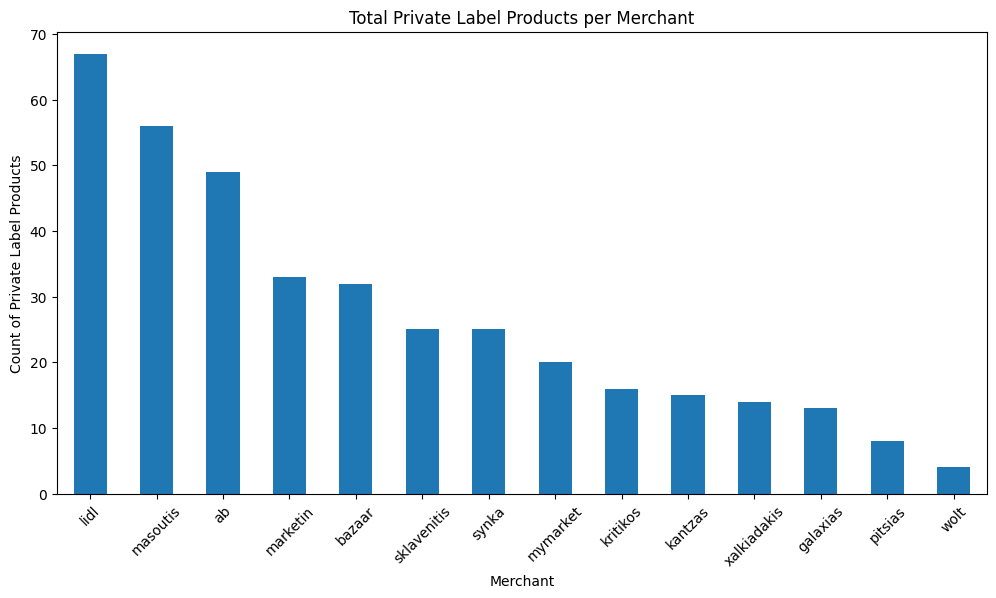

In [171]:
# Sum private label products per merchant
pl_per_merchant= df[df['pl'] == "1"].groupby(['merchant_name', 'category_name']).size().unstack().fillna(0).sum(axis=1)


# Bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
pl_per_merchant.sort_values(ascending=False).plot(kind='bar')
plt.title('Total Private Label Products per Merchant')
plt.xlabel('Merchant')
plt.ylabel('Count of Private Label Products')
plt.xticks(rotation=45)
plt.show()

#### e. How many products of private label per parent category each merchant offers?

In [167]:
# Count of private label (pl) products per parent category per merchant
df[df['pl'] == "1"].groupby(['merchant_name', 'parent_categ']).size().unstack().fillna(0)

parent_categ,Αλλαντικά,"Αναψυκτικά, Νερά & Χυμοί",Απορρυπαντικά & Είδη Καθαρισμού,"Αυγά, Βούτυρο, Νωπές Ζύμες & Ζωμοί",Βρεφικές & Παιδικές τροφές,"Γάλατα, Ροφήματα & Χυμοί ψυγείου","Γιαούρτια, Κρέμες γάλακτος & Επιδόρπια ψυγείου",Είδη Αρτοζαχαροπλαστείου,Είδη πρωινού & Ροφήματα,Καλλυντικά & Είδη Προσωπικής υγιεινής,Κατεψυγμένα,Τροφές & Είδη για Κατοικίδια,Τρόφιμα Παντοπωλείου,Τυροκομικά & Φυτικά Αναπληρώματα,Φρέσκο Κρέας,"Χαρτικά, Πάνες & Σερβιέτες"
merchant_name,,,,,,,,,,,,,,,,
ab,2.0,1.0,4.0,2.0,0.0,4.0,2.0,2.0,3.0,1.0,1.0,3.0,9.0,5.0,5.0,5.0
bazaar,1.0,1.0,4.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0,11.0,1.0,0.0,4.0
galaxias,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0
kantzas,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0
kritikos,0.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,4.0
lidl,2.0,1.0,3.0,1.0,1.0,9.0,3.0,3.0,4.0,4.0,5.0,2.0,15.0,5.0,3.0,6.0
marketin,1.0,0.0,7.0,1.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,9.0,1.0,0.0,7.0
masoutis,4.0,1.0,7.0,5.0,0.0,3.0,0.0,1.0,4.0,2.0,3.0,4.0,11.0,3.0,0.0,8.0
mymarket,0.0,0.0,1.0,0.0,0.0,6.0,4.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0


#### f. How many pl products per sub category each merchant offers?
**IMPORTANT**

In [26]:
df[df['pl'] == "1"].groupby(['merchant_name', 'category_name']).size().unstack()

category_name,Αλεύρι,Απορρυπαντικά Πιάτων,Απορρυπαντικά Πλυντηρίου,Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες,Αυγά,Γάλα Εβαπορέ,Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%),Γάλα Φρέσκο Πλήρες,Γάλα για βρέφη,Γάλα παστερίωσης με χαμηλά λιπαρά,...,Φακές,Φασόλια,Φρυγανιές,Χαρτί Κουζίνας,Χαρτί Υγείας,Χυμός Πορτοκάλι,Χυμός Τομάτας Διατηρημένος,Ψάρια Κατεψυγμένα,Ψωμί Φραντζόλα,Ψωμί για Tοστ
merchant_name,,,,,,,,,,,,,,,,,,,,,
ab,NaN,NaN,1.0,3.0,2.0,2.0,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
bazaar,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0
galaxias,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
kantzas,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
kritikos,NaN,1.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN
lidl,2.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
marketin,1.0,2.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
masoutis,1.0,3.0,1.0,3.0,5.0,1.0,NaN,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN
mymarket,NaN,1.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,2.0


In [27]:
# Count of private label (pl) products per sub category per merchant
df[df['pl'] == "1"].groupby(['merchant_name', 'category_name']).size().unstack().fillna(0)
# df_pl_count.to_csv("Merchant_Category_PL_Count.csv")



category_name,Αλεύρι,Απορρυπαντικά Πιάτων,Απορρυπαντικά Πλυντηρίου,Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες,Αυγά,Γάλα Εβαπορέ,Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%),Γάλα Φρέσκο Πλήρες,Γάλα για βρέφη,Γάλα παστερίωσης με χαμηλά λιπαρά,...,Φακές,Φασόλια,Φρυγανιές,Χαρτί Κουζίνας,Χαρτί Υγείας,Χυμός Πορτοκάλι,Χυμός Τομάτας Διατηρημένος,Ψάρια Κατεψυγμένα,Ψωμί Φραντζόλα,Ψωμί για Tοστ
merchant_name,,,,,,,,,,,,,,,,,,,,,
ab,0.0,0.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
bazaar,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
galaxias,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
kantzas,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
kritikos,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
lidl,2.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
marketin,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
masoutis,1.0,3.0,1.0,3.0,5.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0
mymarket,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0


In [37]:
df.groupby('category_name')['pl'].value_counts().sort_values(ascending=True).unstack()

pl,0,0,1,279374.jpg
category_name,,,,
Αλεύρι,NaN,18.0,9.0,NaN
Απορρυπαντικά Πιάτων,NaN,10.0,13.0,NaN
Απορρυπαντικά Πλυντηρίου,NaN,16.0,9.0,NaN
Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες,NaN,9.0,19.0,NaN
Αυγά,NaN,18.0,12.0,NaN
Γάλα Εβαπορέ,NaN,22.0,8.0,NaN
Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%),NaN,27.0,7.0,NaN
Γάλα Φρέσκο Πλήρες,NaN,27.0,8.0,NaN
Γάλα για βρέφη,NaN,16.0,1.0,NaN


#### g. What is the percentage of private labels per category per merchant?
**IMPORTANT**

##### I created a df with the percentages `df_pl_percentage`

In [31]:
df_pl_percentage = pd.read_csv("Merchant_Category_PL_Percentage.csv")
df_pl_percentage = df_pl_percentage.round(1)
df_pl_percentage

,Unnamed: 0,merchant_name,Αλεύρι,Απορρυπαντικά Πιάτων,Απορρυπαντικά Πλυντηρίου,Απορρυπαντικά για Σφουγγάρισμα - Χλωρίνες,Αυγά,Γάλα Εβαπορέ,Γάλα Φρέσκο (Χαμηλά Λιπαρά <2%),Γάλα Φρέσκο Πλήρες,...,Φακές,Φασόλια,Φρυγανιές,Χαρτί Κουζίνας,Χαρτί Υγείας,Χυμός Πορτοκάλι,Χυμός Τομάτας Διατηρημένος,Ψάρια Κατεψυγμένα,Ψωμί Φραντζόλα,Ψωμί για Tοστ
0,0,ab,0.0,0.0,100.0,100.0,100.0,50.0,50.0,50.0,...,50.0,50.0,100.0,100.0,100.0,100.0,50.0,100.0,0.0,100.0
1,1,bazaar,50.0,100.0,50.0,100.0,100.0,0.0,0.0,0.0,...,50.0,50.0,0.0,100.0,100.0,100.0,50.0,0.0,0.0,100.0
2,2,efood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,efresh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,galaxias,0.0,0.0,0.0,33.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
5,5,kantzas,0.0,0.0,50.0,50.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0
6,6,kritikos,0.0,100.0,0.0,100.0,0.0,66.7,0.0,0.0,...,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,0.0,0.0
7,7,lidl,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
8,8,marketin,50.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,...,50.0,50.0,0.0,100.0,100.0,0.0,50.0,0.0,0.0,0.0
9,9,masoutis,50.0,100.0,50.0,100.0,55.6,50.0,0.0,0.0,...,50.0,50.0,50.0,50.0,66.7,100.0,50.0,100.0,0.0,0.0


##### By itterating through each merchant and each category, I create a list of how many categories have **ONLY PL PRODUCTS**

In [211]:
# Drop the Unnamed: 0 column if it exists
if 'Unnamed: 0' in df_pl_percentage.columns:
    df_pl_percentage = df_pl_percentage.drop(columns=['Unnamed: 0'])

# Create a dictionary to store the categories with 100% PL for each merchant
merchant_categories_100pl = {}

# Loop through each merchant to find categories with 100% PL
for index, row in df_pl_percentage.iterrows():
    merchant = row['merchant_name']
    categories_100pl = df_pl_percentage.columns[(row == 100.0)].tolist()
    if categories_100pl:
        merchant_categories_100pl[merchant] = categories_100pl

# Ensure that the merchant names are correctly used as keys in the dictionary
merchant_category_count = {merchant: len(categories) for merchant, categories in merchant_categories_100pl.items()}

# Display the count for each merchant again
merchant_category_count

{'ab': 23,
 'bazaar': 20,
 'galaxias': 7,
 'kantzas': 13,
 'kritikos': 9,
 'lidl': 55,
 'marketin': 20,
 'masoutis': 15,
 'mymarket': 10,
 'pitsias': 6,
 'sklavenitis': 7,
 'synka': 9,
 'wolt': 3,
 'xalkiadakis': 7}

##### Visualisation 

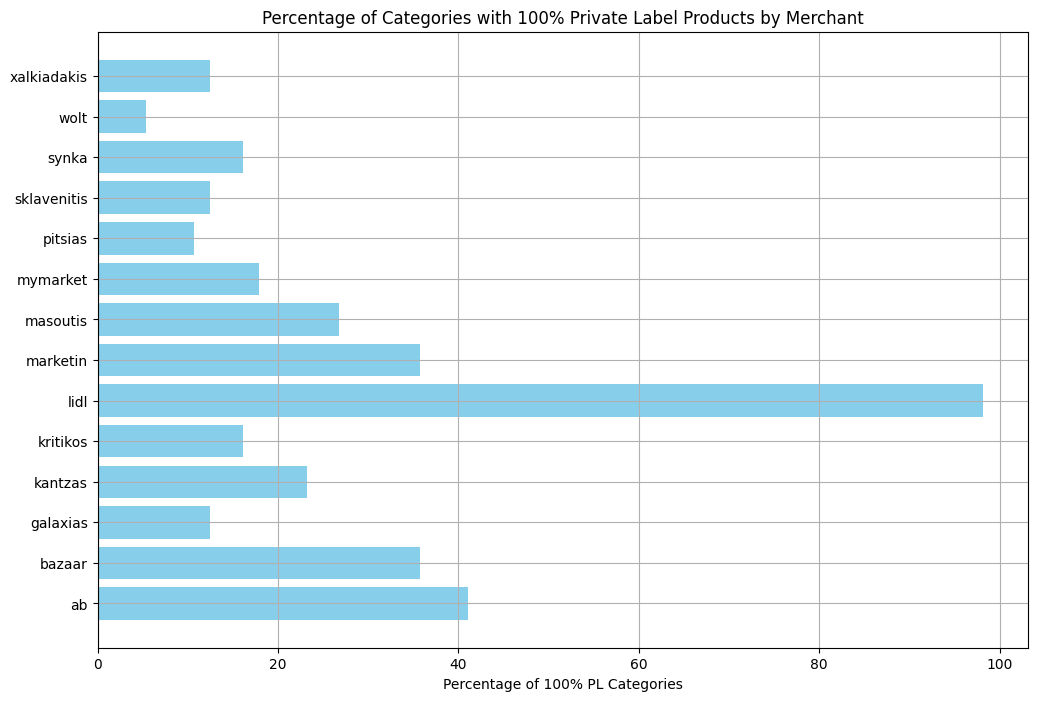

In [214]:
# Visualize the percentage of 100% PL categories for each merchant
fig, ax = plt.subplots(figsize=(12, 8))
merchants = list(merchant_percentage_100pl.keys())
percentages = list(merchant_percentage_100pl.values())

ax.barh(merchants, percentages, color='skyblue')
ax.set_xlabel('Percentage of 100% PL Categories')
ax.set_title('Percentage of Categories with 100% Private Label Products by Merchant')
plt.grid(True)
plt.show()

##### Then I calculated the percentage of **ONLY PL PRODUCTS** categories for each merchant

In [212]:
# Calculate the total number of categories (excluding 'merchant_name')
total_categories = len(df_pl_percentage.columns) - 1  # Subtract 1 for 'merchant_name' column

# Calculate the percentage of 100% PL categories out of all categories for each merchant
merchant_percentage_100pl = {merchant: (count / total_categories) * 100 for merchant, count in merchant_category_count.items()}

# Display the percentage for each merchant
merchant_percentage_100pl

{'ab': 41.07142857142857,
 'bazaar': 35.714285714285715,
 'galaxias': 12.5,
 'kantzas': 23.214285714285715,
 'kritikos': 16.071428571428573,
 'lidl': 98.21428571428571,
 'marketin': 35.714285714285715,
 'masoutis': 26.785714285714285,
 'mymarket': 17.857142857142858,
 'pitsias': 10.714285714285714,
 'sklavenitis': 12.5,
 'synka': 16.071428571428573,
 'wolt': 5.357142857142857,
 'xalkiadakis': 12.5}

##### Visualisation 

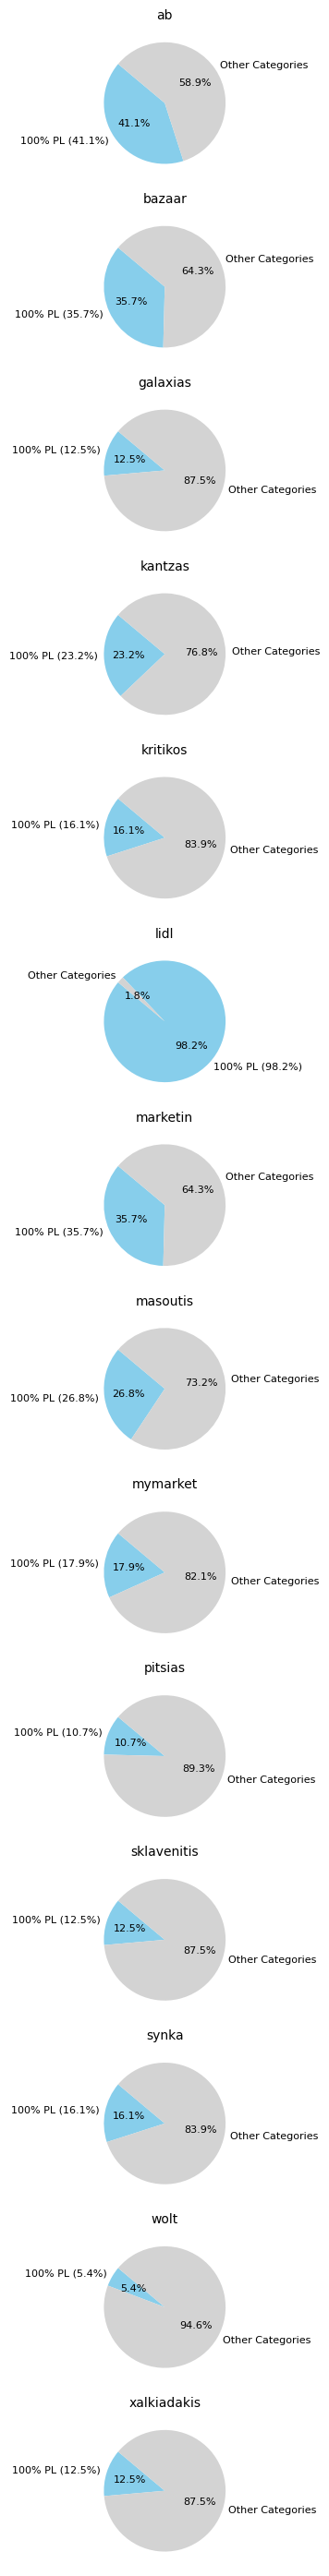

In [216]:
# Create a pie chart for each merchant with smaller pies to fit better
fig, axes = plt.subplots(nrows=len(merchant_percentage_100pl), ncols=1, figsize=(8, len(merchant_percentage_100pl) * 2))

for ax, (merchant, percentage) in zip(axes, merchant_percentage_100pl.items()):
    wedges, texts, autotexts = ax.pie([percentage, 100 - percentage], labels=[f'100% PL ({percentage:.1f}%)', 'Other Categories'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgray'])
    for text in texts:
        text.set_fontsize(8)
    for autotext in autotexts:
        autotext.set_fontsize(8)
    ax.set_title(f'{merchant}', fontsize=10)

plt.tight_layout()
plt.show()


##### The distribution of PL percentages for each merchant 

In [36]:
# Ensure 'pl' column is numeric and drop NaNs
df['pl'] = pd.to_numeric(df['pl'], errors='coerce')
df = df.dropna(subset=['pl'])

# Create a pivot table to get the percentage of PL products per category per merchant
df_pivot = df.pivot_table(index='merchant_name', columns='category_name', values='pl', aggfunc='mean') * 100

# Melt the pivot table to get it back to long format
df_melted = df_pivot.reset_index().melt(id_vars=['merchant_name'], var_name='category', value_name='pl_percentage')

# Define bins for the new percentage ranges
bins = [0, 10, 50, 90, 100]
labels = ['Only non-PL products', 'More non-PL products', 'More PL products', 'Only PL products']

# Categorize the percentages
df_melted['pl_category'] = pd.cut(df_melted['pl_percentage'], bins=bins, labels=labels, include_lowest=True)

# Group by merchant and pl_category to calculate the counts
merchant_distribution = df_melted.groupby(['merchant_name', 'pl_category']).size().unstack(fill_value=0)

# Calculate the total categories per merchant to get the proportions
merchant_distribution_percentage = merchant_distribution.div(merchant_distribution.sum(axis=1), axis=0) * 100

# Verify the intermediate results
print("Melted DataFrame:")
print(df_melted.head())
print("Merchant Distribution Counts:")
print(merchant_distribution)
print("Merchant Distribution Percentages:")
print(merchant_distribution_percentage)


Melted DataFrame:
  merchant_name category  pl_percentage           pl_category
0            ab   Αλεύρι            0.0  Only non-PL products
1        bazaar   Αλεύρι           50.0  More non-PL products
2         efood   Αλεύρι            0.0  Only non-PL products
3        efresh   Αλεύρι            0.0  Only non-PL products
4      galaxias   Αλεύρι            0.0  Only non-PL products
Merchant Distribution Counts:
pl_category    Only non-PL products  More non-PL products  More PL products  \
merchant_name                                                                 
ab                               17                    15                 1   
bazaar                           24                     9                 1   
efood                            56                     0                 0   
efresh                           56                     0                 0   
galaxias                         47                     1                 1   
kantzas                    

C:\Users\Dafni\AppData\Local\Temp\ipykernel_18876\1075377972.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merchant_distribution = df_melted.groupby(['merchant_name', 'pl_category']).size().unstack(fill_value=0)


In [37]:
merchant_distribution_percentage

pl_category,Only non-PL products,More non-PL products,More PL products,Only PL products
merchant_name,,,,
ab,30.357143,26.785714,1.785714,41.071429
bazaar,44.444444,16.666667,1.851852,37.037037
efood,100.000000,0.000000,0.000000,0.000000
efresh,100.000000,0.000000,0.000000,0.000000
galaxias,83.928571,1.785714,1.785714,12.500000
kantzas,73.214286,3.571429,0.000000,23.214286
kritikos,76.785714,5.357143,1.785714,16.071429
lidl,0.000000,0.000000,0.000000,100.000000
marketin,50.000000,14.285714,0.000000,35.714286


##### Visualisation 

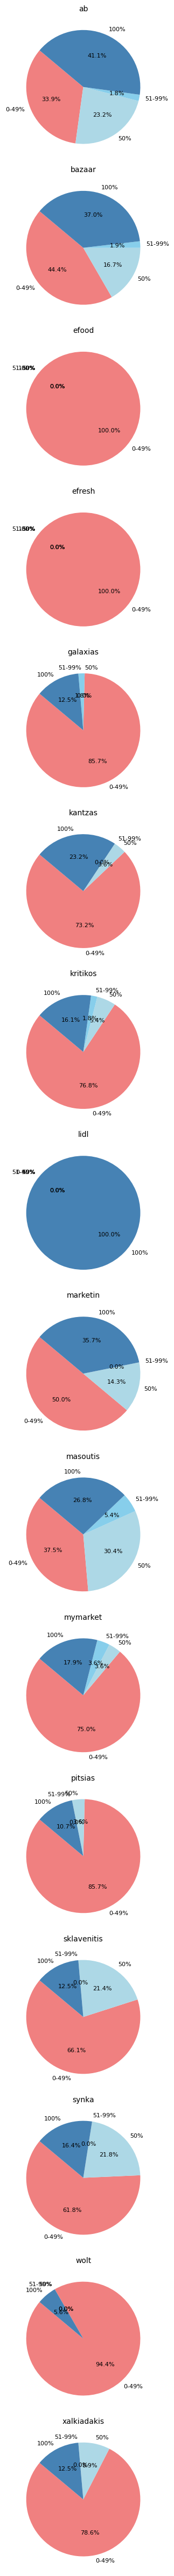

In [223]:
# Plot the distribution as pie charts
fig, axes = plt.subplots(nrows=len(merchant_distribution_percentage), ncols=1, figsize=(8, len(merchant_distribution_percentage) * 3))

for ax, (merchant, row) in zip(axes, merchant_distribution_percentage.iterrows()):
    wedges, texts, autotexts = ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue', 'skyblue', 'steelblue'])
    for text in texts:
        text.set_fontsize(8)
    for autotext in autotexts:
        autotext.set_fontsize(8)
    ax.set_title(f'{merchant}', fontsize=10)

plt.tight_layout()
plt.show()